In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Перемешиваем массив
def monty_hall_without_change(choices):
    random.shuffle(choices)
    return choices[random.randrange(len(choices))]

In [3]:
# Перемешиваем массив
def monty_hall_with_change(choices):
    random.shuffle(choices)
    # Первый выбор
    first_choice = random.randrange(len(choices))
    # Ведущий открывает дверь с козлом
    for i in range(len(choices)):
        if i != first_choice and choices[i] == 'к':
            host_choice = i
            break
    # Второй выбор отменяет первое решение
    for i in range(len(choices)):
        if i != first_choice and i != host_choice:
            return choices[i]

In [33]:
# К - козел, а - автомобиль
# По условию задачи имеем двух козлов и один автомобиль
choices = ['к', 'к', 'а']
# Количество опытов
N = 100000

# Вариант с неизменным выбором
win_count = 0
for _ in range(N):
    result = monty_hall_without_change(choices)
    if result == 'а':
        win_count += 1
P_without_change = round(win_count/N, 3)


# Вариант с изменением выбора
win_count = 0
for _ in range(N):
    result = monty_hall_with_change(choices)
    if result == 'а':
        win_count += 1
P_with_change = round(win_count/N, 3)

In [34]:
# Вероятность выиграть - частота выигранных опытов
print(f'Вероятность выиграть без изменения двери {P_without_change}')
print(f'Вероятность выиграть с изменением двери {P_with_change}')

Вероятность выиграть без изменения двери 0.333
Вероятность выиграть с изменением двери 0.665


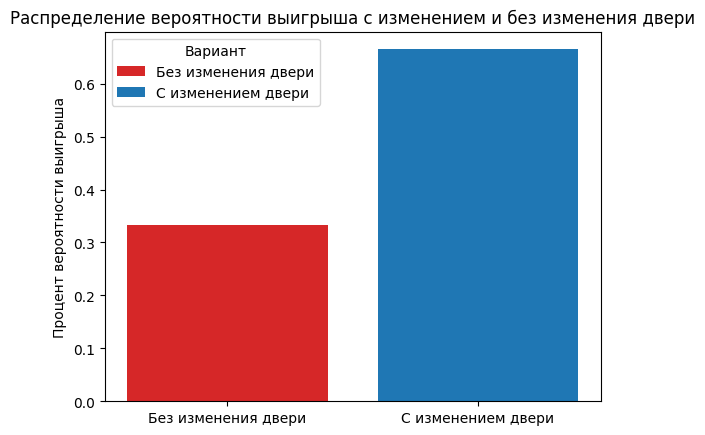

In [35]:
# Строим график, демонстрирующий вероятность
fig, ax = plt.subplots()

fruits = ['Без изменения двери', 'С изменением двери']
option = [P_without_change, P_with_change]
bar_labels = ['Без изменения двери', 'С изменением двери']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, option, label=bar_labels, color=bar_colors)

ax.set_ylabel('Процент вероятности выигрыша')
ax.set_title('Распределение вероятности выигрыша с изменением и без изменения двери')
ax.legend(title='Вариант')

plt.show()